### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [50]:
df = pd.read_csv('data/telco_churn_data.csv')

In [51]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [53]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


### Checking Which Columns is Missing

In [54]:
df.isna().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

### Selecting columns with object type

I want to drop the geographic dimension of segmentation. I will also drop Total Refund because it does not directly reflect the purchasing behavior. Unless we are looking at the effect of customer dissatifactory or anomolies then it ideal to keep the variable.

In [56]:
df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Churn Value', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction'],
      dtype='object')

In [58]:
object_cols = df.select_dtypes('object').columns.tolist() + ['Total Refunds', 'Total Long Distance Charges', 'Zip Code', 'Latitude', 'Longitude','Population']
drop_obj_cols = df.drop(object_cols, axis=1)

### Drop Missing Value

In [59]:
drop_obj_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Extra Data Charges           7043 non-null   float64
 7   Age                                7043 non-null   int64  
 8   Number of Dependents               7043 non-null   int64  
 9   Churn Value                        7043 non-null   int64  
 10  CLTV                               7043 non-null   int64  
 11  Total Customer Svc Requests        7043 non-null   int64

In [60]:
df_cleaned = drop_obj_cols.dropna()

In [62]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 3 to 7040
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                1834 non-null   int64  
 1   Tenure in Months                   1834 non-null   int64  
 2   Avg Monthly Long Distance Charges  1834 non-null   float64
 3   Avg Monthly GB Download            1834 non-null   int64  
 4   Monthly Charge                     1834 non-null   float64
 5   Total Regular Charges              1834 non-null   float64
 6   Total Extra Data Charges           1834 non-null   float64
 7   Age                                1834 non-null   int64  
 8   Number of Dependents               1834 non-null   int64  
 9   Churn Value                        1834 non-null   int64  
 10  CLTV                               1834 non-null   int64  
 11  Total Customer Svc Requests        1834 non-null   int64  
 1

Now that the data is cleaned. Let's proceed to PCA  

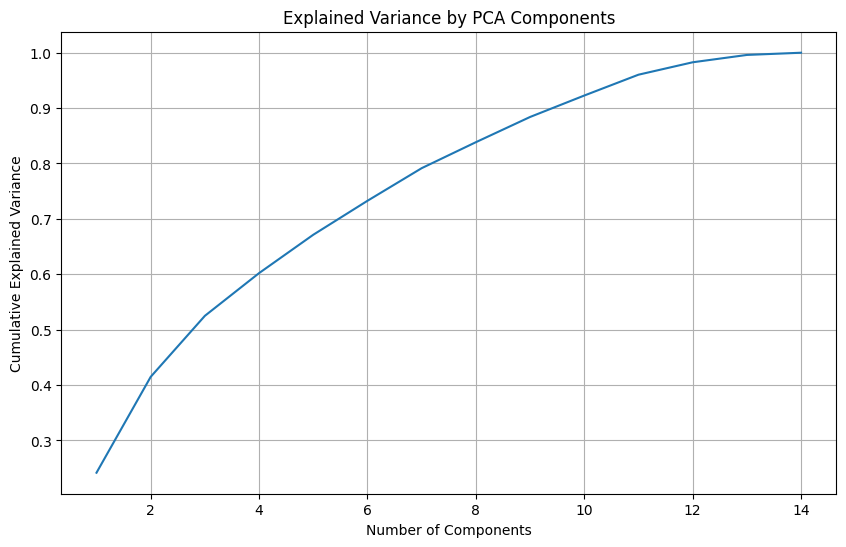

array([0.24164193, 0.41479646, 0.52495057, 0.60208208, 0.67133461,
       0.73267338, 0.79154228, 0.83843996, 0.88398037, 0.92269025,
       0.96031934, 0.98273467, 0.99599111, 1.        ])

In [67]:
df = df_cleaned

# let's normalize the data
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

# let's visualized the explained variance by PCA components to k numbers of components
pca = PCA()
pca_transformed = pca.fit_transform(df_norm)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance

In this graph, it seems to flatten out around 8-10. I would personally choose 10 because it seems to keep moving at angle for a bit longer after to 11; the variance explained by 85%-95% is ideal. So let's do k = 10
n_components = 10

Now let determine number of cluster for KMeans algo

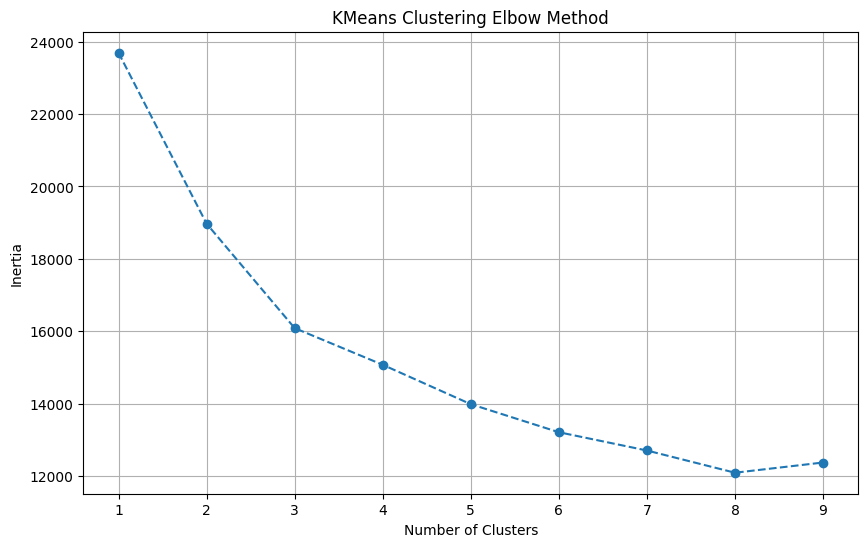

In [70]:
inertia = []
range_value = range(1, 10)
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_transformed[:, :10]) # again, we are using the first 10 components of our PCA
    inertia.append(kmeans.inertia_)

# let's viz the elbows
plt.figure(figsize=(10, 6))
plt.plot(range_value, inertia, marker='o', linestyle='--')
plt.title('KMeans Clustering Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


between 3 and 4, there are a slow in the pace of change, after 4 is just consistently slow. Therefore let's choose k=4

Now let's actually perform the kmean with our optimate PCA and KMeans

In [72]:
# use optimal PCA to find the components

pca = PCA(n_components=10, random_state=42)
components = pca.fit_transform(df_norm)

In [76]:
# now that we have the components, find the kmeans
optimal_cluster = 4
kmeans = KMeans(n_clusters=optimal_cluster, random_state=42).fit(components)
df['Cluster'] = kmeans.labels_

C:\Users\Duy Nguyen\AppData\Local\Temp\ipykernel_4164\2044714475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


In [83]:
df = df.reset_index()

,level_0,index,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Extra Data Charges,Age,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction,Cluster
0,0,3,1,25,19.76,13,102.440,2514.50,327.0,78,1,1,5337,1,1,2.0,2
1,1,4,1,37,6.33,15,79.560,2868.15,430.0,80,1,1,2793,1,0,2.0,2
2,2,7,6,58,0.00,26,47.112,2651.20,689.0,66,0,1,5444,2,1,1.0,2
3,3,8,0,15,44.07,21,77.428,1145.70,241.0,70,2,1,5717,3,0,2.0,2
4,4,10,0,11,11.59,32,98.800,1120.30,358.0,78,1,1,5980,2,2,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1829,7018,8,64,49.26,18,105.400,6794.75,1223.0,61,0,0,4512,1,0,3.0,3
1830,1830,7026,0,51,19.23,0,20.650,1020.75,0.0,25,0,0,4725,1,0,3.0,0
1831,1831,7029,0,72,33.93,18,104.950,7544.30,135.8,45,0,0,5760,2,1,5.0,3
1832,1832,7034,0,2,6.85,0,20.050,39.25,0.0,57,0,0,5191,1,0,3.0,0


In [91]:
# let's see the distribution of clusters
df.Cluster.value_counts()

Cluster
2    599
0    520
3    416
1    299
Name: count, dtype: int64

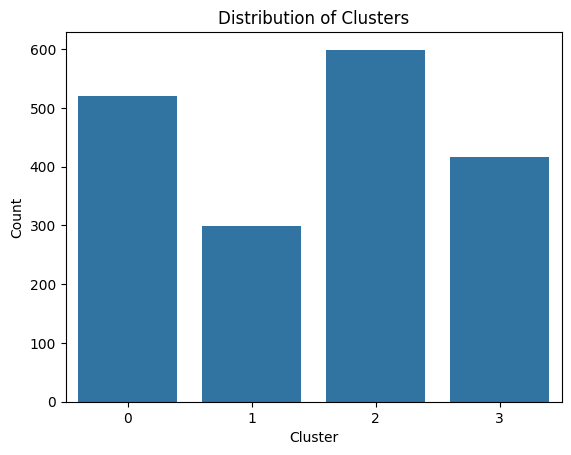

In [101]:
# Analyzing cluster means for each feature
cluster_centroids = df.groupby('Cluster').mean()

# Visualizing the distribution of clusters
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [102]:
cluster_centroids

,level_0,index,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Extra Data Charges,Age,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
Cluster,,,,,,,,,,,,,,,,
0,1155.065385,4197.180769,0.540385,24.025000,21.591635,15.584615,49.759492,1137.609615,53.363462,45.682692,0.150000,0.025000,4064.215385,1.536538,0.240385,3.830769
1,1272.501672,4657.468227,5.591973,37.892977,21.357057,20.535117,47.466629,1712.765686,137.884448,43.247492,1.752508,0.013378,4655.772575,1.605351,0.217391,3.779264
2,434.100167,1415.051753,0.449082,12.971619,23.108965,23.045075,75.237295,1025.996828,158.870267,50.803005,0.091820,0.998331,4020.412354,3.016694,0.948247,1.677796
3,1057.026442,3825.519231,2.975962,60.730769,25.999952,31.471154,93.216168,5628.712981,990.880529,44.377404,0.435096,0.158654,5100.894231,1.658654,0.266827,3.329327


from looking at these number, it quite a bit complex to interpret. To support this, let's visualize through scatter point and the model pointing the centroid at the clusters

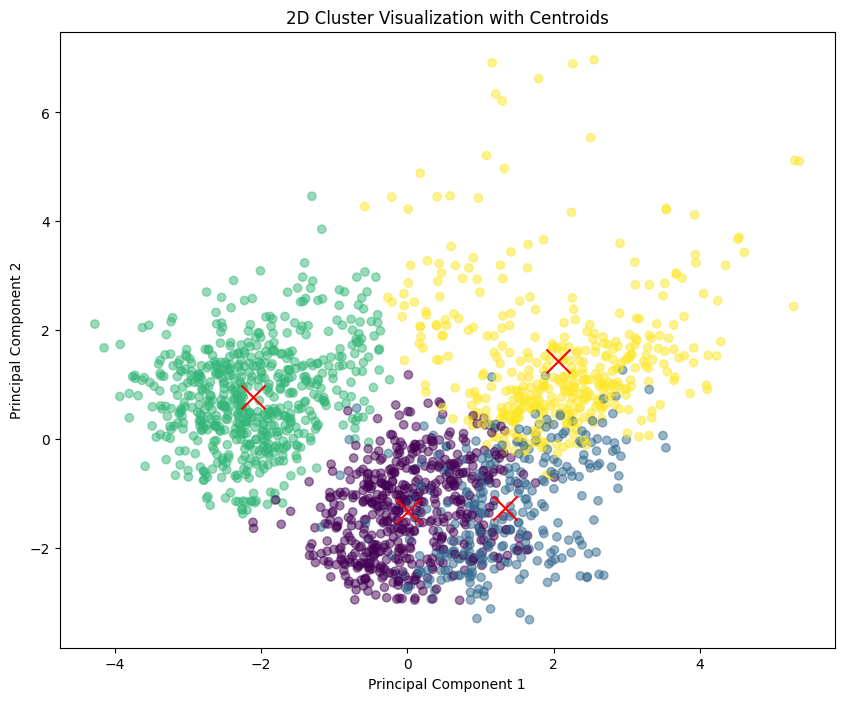

In [106]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, marker='x')  # s is the size of the centroid markers

plt.title('2D Cluster Visualization with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


green and blue is overlapping, let's visualized this in three see if we can see if better?

In [112]:
import plotly.graph_objs as go
import numpy as np

# Assuming 'components' is your PCA-transformed data with 3 principal components
# And 'kmeans.labels_' contains your cluster labels

# Extracting the centroids
centroids = kmeans.cluster_centers_

# Create a trace for the data points
trace1 = go.Scatter3d(
    x=components[:, 0],
    y=components[:, 1],
    z=components[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=kmeans.labels_,                # set color to the cluster labels
        colorscale='Viridis',                # choose a colorscale
        opacity=0.8
    )
)

# Create a trace for the centroids
trace2 = go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color=np.arange(len(centroids)),    # distinct color for each centroid
        colorscale='Viridis',
        symbol='x',
        line=dict(
            color='black',
            width=1
        )
    ),
    name='Centroids'
)

data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


as you can see purple and blue is quite overlapping, however, with kmeans algorithm, we were able to segment at the numerical individual data points without visualy segmenting. 

let's analyse the number of clustering group mean:

Variables of intererst:

Number of Referrals	
- high meaning that there is a cluster where people are refering to each other. That means are satisfy with the product. (0-5)
Tenure in Months	
- high meaning the customer has been using the service for a while. This is an indication of loyalty of the customer, a long-term commitment.
Avg Monthly Long Distance Charges	
- this varialbe indicates whether a customer is spending more on long distance calling, high simply mean that the customer usage are high.
Avg Monthly GB Download	Monthly Charge	
- this variable indicates whether a customer is using a lot of data monthly. This indicate that this customer is cluster in those who love using a lot of data for tiktok and other social media.
Total Regular Charges
- overall, this variable indicate customer accumulate high charges in total. High value in this case would indicate that the cluster group is a consistent usage across service on average, long-term engagement that charges accumulate overtime. 
Total Extra Data Charges	
- this happens when the user pay for the plan and still for some reason still get over charge, either the customer need even more data or paying for a cheaper plan but use more data that. both way, this is an indication that there are not a suitable plan for the user on average.
Age	Number of Dependents
- 	
Churn Value
- this is the cluster group that indicate whether the customer is highly to leave the company.
CLTV
- customer lifetime value indicate the rate at which whether customer bring would bring high value to the company through, long-term payment (loyalty), high spending, or both.
Total Customer Svc Requests	

Base on these descriptions, what does the cluster 0, 1, 2, 3 tells you about what kind of customers:
**Cluster 0**:
- in tenure in Months, it is second to last on the lower side of the spectrum, indicate a low numerically, indicate newer customers or those who are less engaging in the referal program.
- averaged monthly charged is fairly in the middle, on the low side as well, indicate a fairly normal spending
- fairly on the low customer request and issue report as well, again less engagement
    - surprisingly the customer is refer a lot, probably since they are new, they are taking advantage of the refer to save some money
- low churn value and CLTV as well indicate that the customer might be stable, not leaving the service but overall low profit from this segment.


**Cluster 1:**
- pretty moderate rate of tenure while high level of referals, indication of satisfy customer
- pretty moderate total regular charge, eventhough these customer might be new but highly promissing for longterm billing.
- again, pretty low churn value and CLTV, indicate loyalty customer, this group like what they are using. Good note to figure out what plan is that and why is that
- pretty moderate customer service request or issue report, pretty stable cost. possibly this group product and service are satisfy


**Cluster 2:**
- This group has a really low rate of tenure, suggesting that the customers are fairly new
- a very high rate of charges relative to their tenure, this is an indication of premium plan.
- high extra data charges, there is a lot of issue report. There seems to be a dissatifcation
- very high churn while low CLTV meaning the customer is very likely to leave and havve no impact on the company profit.


**Cluster 3:**
- moderate level of referals and very high levvel of tenure, this is an indication of high level of loyalty
- high level of monthly charge, their high level of usage, or premium package.
- similar to cluster 1, high level of dependenices and age, maybe it a family plan.
- moderate churn rate and high level of CLTV, give this, is a good combination of unlikely to leaev the company and make profit.    


Then from these character descriptions:

**Customer 0:** Standard Customer

**Customer 1:** Loyal Advocate

**Customer 2:** High Risk

**Customer 3:** Valuable Long-term 



In [115]:
cluster_centroids

,level_0,index,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Extra Data Charges,Age,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
Cluster,,,,,,,,,,,,,,,,
0,1155.065385,4197.180769,0.540385,24.025000,21.591635,15.584615,49.759492,1137.609615,53.363462,45.682692,0.150000,0.025000,4064.215385,1.536538,0.240385,3.830769
1,1272.501672,4657.468227,5.591973,37.892977,21.357057,20.535117,47.466629,1712.765686,137.884448,43.247492,1.752508,0.013378,4655.772575,1.605351,0.217391,3.779264
2,434.100167,1415.051753,0.449082,12.971619,23.108965,23.045075,75.237295,1025.996828,158.870267,50.803005,0.091820,0.998331,4020.412354,3.016694,0.948247,1.677796
3,1057.026442,3825.519231,2.975962,60.730769,25.999952,31.471154,93.216168,5628.712981,990.880529,44.377404,0.435096,0.158654,5100.894231,1.658654,0.266827,3.329327
